In [212]:
!jt -t solarizedl

# Lab 5
Ryan Wang <br>
May 17th, 2020
***

## Introduction

This lab will expand on the materials covered in the `geopandas` geoprocessing and geovisualization demonstrations. Throguhout this document, I will use two examples to practice the techniques covered regarding GIS visulizations and data analytics.
***

## Geoprocessing with GeoPandas
In this section, I will explore using Python to process shapefiles for analyses. The two datasets I would use is a California shapefile for counties and another for airports in the US.

In [186]:
%matplotlib inline
import matplotlib
import pandas
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gpd

In [187]:
CAL = gpd.read_file('/Users/ryan/Desktop/UChicago/SOCI 30253/Final_Project_CA_Aviation/geo_export_7550259c-c552-465b-add9-d4ec4ffcee81.shp')

In [188]:
APT = gpd.read_file('/Users/ryan/Desktop/UChicago/SOCI 30253/Final_Project_CA_Aviation/References/USAPT/Aircraft_Landing_Facilities/Aircraft_Landing_Facilities.shp')

### Plotting two shapefiles together

Before we can comfortably plot the two shapes together in one plot, we first need to make sure that the two shapefiles share the same CRS. 

In [189]:
CAL.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [190]:
APT.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In this case they do! If the two files are not using the same CRS, we could try to remedy by using the following code:

In [191]:
# CAL.crs = APT.crs # create a crs for CAL
# CAL = CAL.to_crs(APT.crs) # update the coordinates accordingly

In [192]:
CAL.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

_I do have one question about the import of .dat files, especially for IPUMS data. I have searched around and have not found a useful way to deal with the unique structure of the IPUMS data files. I wish there is a tutorial somewhere to guide me in dealing with import of IPUMS data. I will continue to explore._

#### Adding Points to the Map

In [193]:
CAL['geometry'].head()

0    POLYGON ((-124.21285 41.87082, -124.21202 41.8...
1    POLYGON ((-123.51814 42.00116, -123.51014 42.0...
2    POLYGON ((-121.44763 41.99733, -121.43964 41.9...
3    POLYGON ((-124.06517 41.46458, -124.06435 41.4...
4    POLYGON ((-122.67701 41.28037, -122.67721 41.2...
Name: geometry, dtype: geometry

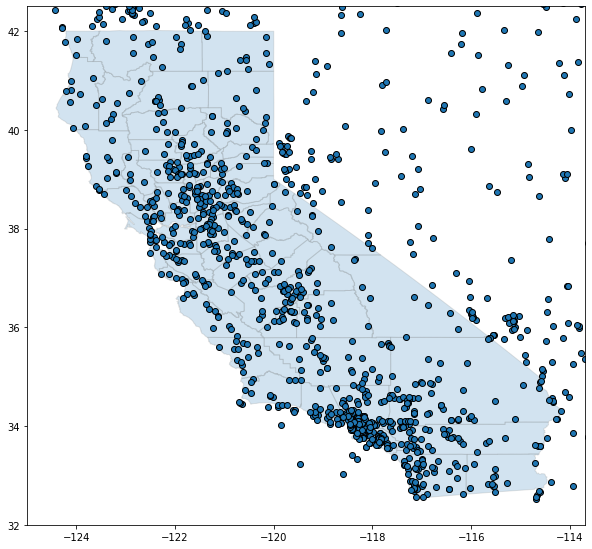

In [194]:
plt.rcParams['figure.figsize'] = (10, 10)
ax = plt.gca()
CAL.plot(ax=ax, edgecolor='grey', alpha=0.2)
APT.plot(ax=ax, edgecolor='k')
ax.set_aspect('equal')
ax.set_xlim(-125, -113.7); ax.set_ylim(32, 42.5)
plt.show()

We have now successfully managed to plot the points onto a background layer. This map shows all the airports (dots) in California. The background is a map with county boundaries. Now this looks a little bit ugly, and many airports outside of California are also shown. How do we make this better and get more useful information out of it?

#### Enhancing the Map

Now, to save only the airports within California boundaries, we can use one of two ways. I find the `lambda` function in the tutorial to be quite interesting, and one of of selecting relevant data could be done using such functions:

In [195]:
CAL['dummy'] = 1.0
state = CAL.dissolve(by='dummy')
r = APT['geometry']
CA_APT = r[r.apply(lambda x: x.intersects(state.iloc[0]['geometry']))]

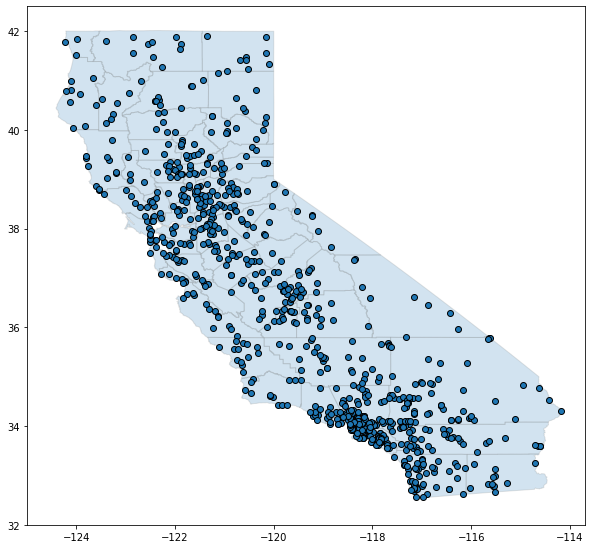

In [196]:
plt.rcParams['figure.figsize'] = (10, 10)
ax = plt.gca()
CAL.plot(ax=ax, edgecolor='grey', alpha=0.2)
CA_APT.plot(ax=ax, edgecolor='k')
ax.set_aspect('equal')
ax.set_xlim(-125, -113.7); ax.set_ylim(32, 42.5)
plt.show()

In [197]:
CA_APT.head

<bound method NDFrame.head of 680      POINT (-118.11590 34.48675)
681      POINT (-117.55556 34.56944)
682      POINT (-117.65339 34.62999)
683      POINT (-117.43633 34.54846)
684      POINT (-117.46060 34.53749)
                    ...             
4549     POINT (-123.39836 40.14320)
4550     POINT (-117.28508 33.03708)
11897    POINT (-115.63139 35.77581)
11955    POINT (-115.62591 35.78334)
11956    POINT (-115.66473 35.75553)
Name: geometry, Length: 854, dtype: geometry>

As we can see, using the `lambda` function would convert the APT shapefile into a GeoSeries, hence deleting other useful information. We use a more conventional select method in `pandas` to preserve all the other attributes in the shapefile.

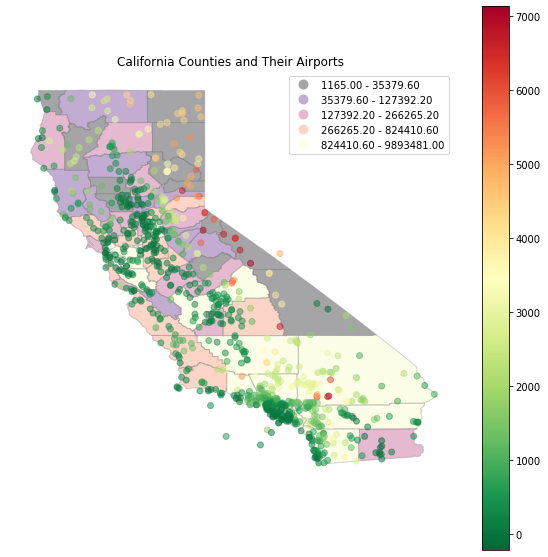

In [198]:
APT = APT.loc[APT['state_name'] == 'CALIFORNIA']
plt.rcParams['figure.figsize'] = (10, 10)
ax = plt.gca()
CAL.plot(ax=ax, legend = True, column = 'Population', scheme='quantiles', cmap='magma', edgecolor='grey', alpha=0.35)
APT.plot(ax=ax, column = 'elevation', cmap='RdYlGn_r', legend = True, alpha = 0.5)
ax.set_aspect('equal')
ax.set_xlim(-125, -113.7); ax.set_ylim(32, 42.5)
ax.set_axis_off()
ax.set_title('California Counties and Their Airports')
plt.show()

The above plot showcases Python's ability to plot information. Two layers in total. The magma color scheme showcases population and is the inner legend, and the green to red scheme showcases airport elevation. Still trying to figure out how to get legend titles, but spatial data seems to be kind of tricky to deal with using `matplotlib` as not many of the attributes are customizable in the plot.

In [199]:
CAL_with_APT = gpd.sjoin(CAL, APT, how='inner', op='intersects')

In [200]:
CAL_with_APT

,POLY_ID,latitude,longitude,name,#,COUNTY*,County,UPPER,State,PCa_IN,...,icao_ident,min_op_net,filler,origin,enplanemen_right,passengers,arrivals,departures,freightlbs_right,maillbs_right
0,1.0,41.743438,-123.896950,Del Norte,2555.0,Del Norte,Del Norte County,DEL NORTE,California,19072.0,...,None,N,None,None,None,None,None,None,None,None
0,1.0,41.743438,-123.896950,Del Norte,2555.0,Del Norte,Del Norte County,DEL NORTE,California,19072.0,...,KCEC,Y,None,CEC,662,662,29,30,0,0
0,1.0,41.743438,-123.896950,Del Norte,2555.0,Del Norte,Del Norte County,DEL NORTE,California,19072.0,...,None,N,None,None,None,None,None,None,None,None
1,2.0,41.592777,-122.540597,Siskiyou,1740.0,Siskiyou,Siskiyou County,SISKIYOU,California,22293.0,...,None,N,None,None,None,None,None,None,None,None
1,2.0,41.592777,-122.540597,Siskiyou,1740.0,Siskiyou,Siskiyou County,SISKIYOU,California,22293.0,...,None,N,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58.0,34.471637,-119.078252,Ventura,184.0,Ventura,Ventura County,VENTURA,California,32930.0,...,None,N,None,None,None,None,None,None,None,None
57,58.0,34.471637,-119.078252,Ventura,184.0,Ventura,Ventura County,VENTURA,California,32930.0,...,KSZP,N,None,None,None,None,None,None,None,None
57,58.0,34.471637,-119.078252,Ventura,184.0,Ventura,Ventura County,VENTURA,California,32930.0,...,None,N,None,None,None,None,None,None,None,None
57,58.0,34.471637,-119.078252,Ventura,184.0,Ventura,Ventura County,VENTURA,California,32930.0,...,None,N,None,None,None,None,None,None,None,None


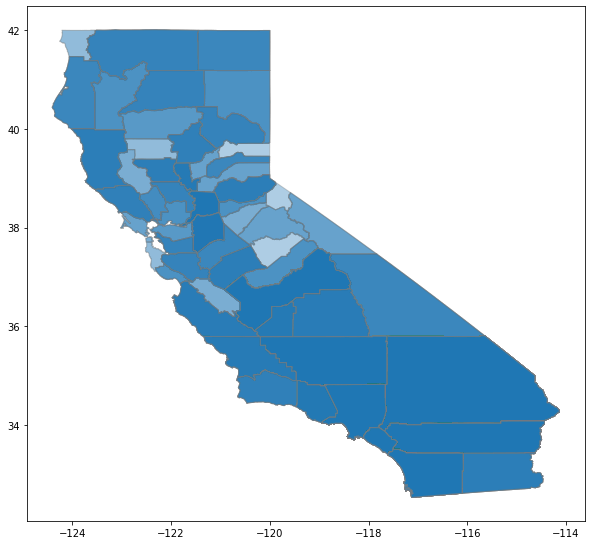

In [201]:
plt.rcParams['figure.figsize'] = (10, 10)
CAL_with_APT.plot(edgecolor='grey', alpha=0.2)

This plot shows the density of airport counts in each county. 

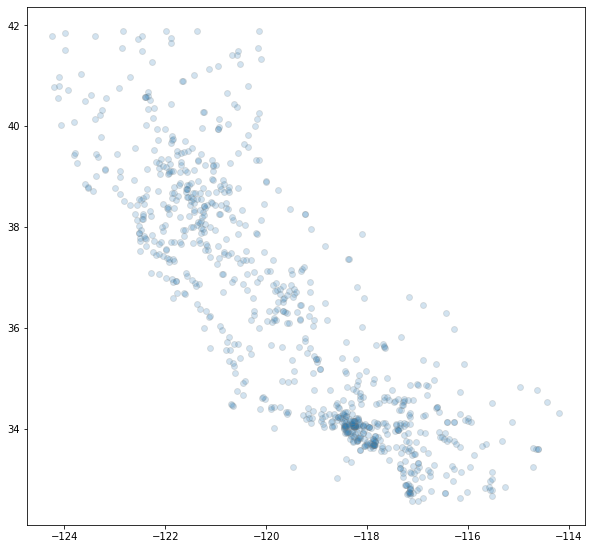

In [202]:
CAL_with_APT = gpd.sjoin(CAL, APT, how='right', op='intersects')
plt.rcParams['figure.figsize'] = (10, 10)
CAL_with_APT.plot(edgecolor='grey', alpha=0.2)

Using `rightjoin` is suppose to show points rather than counties. There are no counties in this map. What is happening is that a right join keeps each of the features from the right DataFrame and lists each unique intersection with a feature from the left DataFrame: the counties.

***

## Geovisualization with PySAL
I find the `splot` package to be quite interesting as it seems to be much more efficient compared to the conventional `matplotlib` method. In this section, I will explore with some mapping using the `splot` package.

In [203]:
from pysal.viz import mapclassify
import geopandas as gpd
from pysal.viz import splot

from splot.mapping import vba_choropleth
from pysal.lib import examples

In [204]:
CMA = gpd.read_file('/Users/ryan/Desktop/GIS 3/Lab 5/CMA.shp')

In the demo, I find the value-by-alpha choropleth map to be quite interesting, so I will explore this feature with my Chicagoland dataset. A VBA choropleth map aims to show variations of two variables. `y` as a transparency mask is determining how much of the choropleth displaying the values of a first variable `x` is shown. In comparison to a cartogram, Value-By-Alpha choropleths will not distort shapes and sizes but modify the alpha channel (transparency) of polygons according to the second input variable `y`. 

In [205]:
CMA.columns

Index(['GISMATCH', 'GISJOIN', 'GEOID', 'STATEFIP', 'State', 'PUMA', 'Name',
       'VALUEH', 'INCWAGE', 'HHINCOME', 'geometry'],
      dtype='object')

In this case we set the x to `INCWAGE` and y to be `VALUEH`. As a comparison, a normal choropleth map is also drawn with `INCWAGE` as the variable. 

In [206]:
x = CMA['INCWAGE'].values
y = CMA['VALUEH'].values

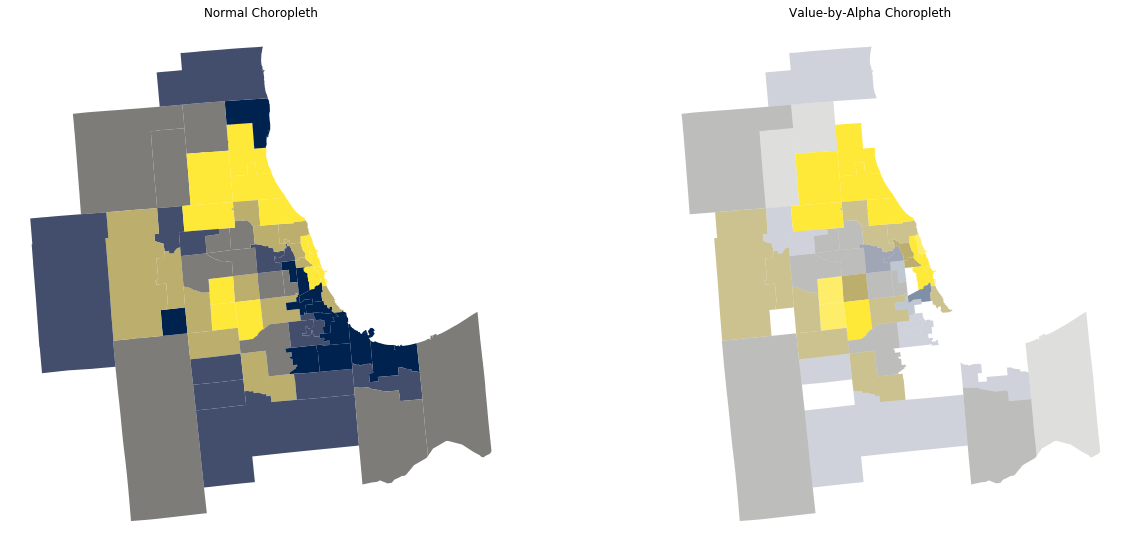

In [207]:
# Create new figure
fig, axs = plt.subplots(1,2, figsize=(20,10))

# regular choropleth
CMA.plot(column='INCWAGE', scheme='quantiles', cmap='cividis', ax=axs[0])

# use vba_choropleth to create Value-by-Alpha Choropleth
vba_choropleth(x, y, CMA, rgb_mapclassify=dict(classifier='quantiles'),
               alpha_mapclassify=dict(classifier='quantiles'),
               cmap='cividis', ax=axs[1])

# set figure style
axs[0].set_title('Normal Choropleth')
axs[0].set_axis_off()
axs[1].set_title('Value-by-Alpha Choropleth')

# plot
plt.show()

By recreating this map we did in R back in Lab 2, with a twist of a VBA choropleth map, We find that high income areas are the least impacted by household values, and these areas lie in the northern side of Chicago. 

_This is the end of Lab 5._